In [ ]:
#Install libraries
!pip install u8darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.2/592.2 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.4/372.4 KB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
#Load Libraries
import pandas as pd
from darts import TimeSeries
from darts.models import NaiveDrift
from darts.metrics import mape

In [ ]:
#Read in the sales data
sales = (
    pd.read_excel("/sales.xlsx", sheet_name = "sales")
    .assign(date=lambda df: df.year.astype(str) + "-" + df.week.astype(str) + "-1")
    .assign(date=lambda df: pd.to_datetime(df.date, format="%Y-%W-%w"))
)

#This code reads a CSV file named "sales.csv" from the "../case/data/" directory and creates a pandas DataFrame object. It then adds a new column named "date" to the DataFrame by concatenating the "year" and "week" columns of the DataFrame and converting the resulting string to a datetime object using the format "%Y-%W-%w". Finally, it replaces the "date" column with the newly created datetime column.
#Overall, this code is used to transform the "sales.csv" dataset by adding a date column that can be used for time-based analysis and visualization.

In [ ]:
#Preview the data
sales.head()

,customer_id,year,week,date,total volume - ml,brand_name,brand_owner,category,sub_category,sales (RAND),...,Units Purchased,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Holiday,Holiday Binary,Month,Season,Season Dummies
0,0091db9e2726ab840251ea69bc0faea3,2022,18,2022-05-02,330,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,6,...,0.481331,NaN,NaN,NaN,NaN,Workers' Day,1,5,Autumn,3.0
1,0091db9e2726ab840251ea69bc0faea3,2022,12,2022-03-21,440,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,6,...,0.460080,NaN,NaN,NaN,NaN,Human Rights Day,1,3,Autumn,3.0
2,0091db9e2726ab840251ea69bc0faea3,2022,52,2022-12-26,2640,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,46,...,0.489000,NaN,NaN,NaN,NaN,Christmas Day,1,12,Summer,2.0
3,0091db9e2726ab840251ea69bc0faea3,2022,46,2022-11-14,2640,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,43,...,0.458277,NaN,NaN,NaN,NaN,0,0,11,Spring,1.0
4,0091db9e2726ab840251ea69bc0faea3,2022,43,2022-10-24,2640,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,45,...,0.472297,NaN,NaN,NaN,NaN,0,0,10,Spring,1.0


In [ ]:
#Names of columns in sales
print(sales.columns)

Index(['customer_id', 'year', 'week', 'date', 'total volume - ml',
       'brand_name', 'brand_owner', 'category', 'sub_category', 'sales (RAND)',
       'sales (USD)', 'volume_hl', 'volume_l', 'volume_ml',
       'Rounded Units Purchased', 'Price per Liter (RAND)',
       'Price per Liter (USD)', 'product_name', 'product_subtype',
       'product_type', 'pack or individual', 'volume - text',
       'drop volume label', 'Extract Pack Size', 'Extract Volume Size',
       'Total volume - Original Form', 'Original Unit', 'Total Volume - ml',
       'Units Purchased', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Holiday', 'Holiday Binary', 'Month', 'Season',
       'Season Dummies'],
      dtype='object')


In [ ]:
#Delete erroneous columns
sales.drop(sales.iloc[:,29:33], inplace=True, axis=1)

In [ ]:
#Names of columns in sales
print(sales.columns)

Index(['customer_id', 'year', 'week', 'date', 'total volume - ml',
       'brand_name', 'brand_owner', 'category', 'sub_category', 'sales (RAND)',
       'sales (USD)', 'volume_hl', 'volume_l', 'volume_ml',
       'Rounded Units Purchased', 'Price per Liter (RAND)',
       'Price per Liter (USD)', 'product_name', 'product_subtype',
       'product_type', 'pack or individual', 'volume - text',
       'drop volume label', 'Extract Pack Size', 'Extract Volume Size',
       'Total volume - Original Form', 'Original Unit', 'Total Volume - ml',
       'Units Purchased', 'Holiday', 'Holiday Binary', 'Month', 'Season',
       'Season Dummies'],
      dtype='object')


In [ ]:
#Read in the customer data
customers = pd.read_excel("/customers.xlsx", sheet_name = "customers")

In [ ]:
#Create a merged data frame
df = (
    sales
    .merge(customers, on="customer_id")
    .set_index("date")
)
#Overall, this code is merging two DataFrames based on a common column and setting the index of the resulting DataFrame to a specific column.
#This can be useful for time-based analysis and visualization, where the "date" column can be used as the x-axis for plotting.


In [ ]:
#Preview combined data
df.head(5)

,customer_id,year,week,total volume - ml,brand_name,brand_owner,category,sub_category,sales (RAND),sales (USD),...,state,city,longitude,latitude,channel,segment,Municipality,% Living in Poverty,Poverty Class,Urban vs. Rural
date,,,,,,,,,,,,,,,,,,,,,
2022-05-02,0091db9e2726ab840251ea69bc0faea3,2022,18,330,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,6,0.330,...,Limpopo,Nkowankowa,30.3008,-23.8843,ON TRADE,REGULAR TAVERN,Greater Tzaneen Local Municipality,0.139,Middle,Rural
2022-03-21,0091db9e2726ab840251ea69bc0faea3,2022,12,440,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,6,0.330,...,Limpopo,Nkowankowa,30.3008,-23.8843,ON TRADE,REGULAR TAVERN,Greater Tzaneen Local Municipality,0.139,Middle,Rural
2022-12-26,0091db9e2726ab840251ea69bc0faea3,2022,52,2640,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,46,2.530,...,Limpopo,Nkowankowa,30.3008,-23.8843,ON TRADE,REGULAR TAVERN,Greater Tzaneen Local Municipality,0.139,Middle,Rural
2022-11-14,0091db9e2726ab840251ea69bc0faea3,2022,46,2640,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,43,2.365,...,Limpopo,Nkowankowa,30.3008,-23.8843,ON TRADE,REGULAR TAVERN,Greater Tzaneen Local Municipality,0.139,Middle,Rural
2022-10-24,0091db9e2726ab840251ea69bc0faea3,2022,43,2640,AMSTEL LAGER,HEINEKEN SOUTH AFRICA,ALCOHOLIC BEVERAGES,BEER - PREMIUM - INTERNATIONAL PREMIUM,45,2.475,...,Limpopo,Nkowankowa,30.3008,-23.8843,ON TRADE,REGULAR TAVERN,Greater Tzaneen Local Municipality,0.139,Middle,Rural


In [ ]:
#Names of columns in sales
print(df.columns)

Index(['customer_id', 'year', 'week', 'total volume - ml', 'brand_name',
       'brand_owner', 'category', 'sub_category', 'sales (RAND)',
       'sales (USD)', 'volume_hl', 'volume_l', 'volume_ml',
       'Rounded Units Purchased', 'Price per Liter (RAND)',
       'Price per Liter (USD)', 'product_name', 'product_subtype',
       'product_type', 'pack or individual', 'volume - text',
       'drop volume label', 'Extract Pack Size', 'Extract Volume Size',
       'Total volume - Original Form', 'Original Unit', 'Total Volume - ml',
       'Units Purchased', 'Holiday', 'Holiday Binary', 'Month', 'Season',
       'Season Dummies', 'state', 'city', 'longitude', 'latitude', 'channel',
       'segment', 'Municipality', '% Living in Poverty', 'Poverty Class',
       'Urban vs. Rural'],
      dtype='object')


In [ ]:
#Remove the unnecessary columns
df.drop('total volume - ml', inplace=True, axis=1)
df.drop( 'sales (USD)', inplace=True, axis=1)
df.drop('volume_l', inplace=True, axis=1)
df.drop('volume_ml', inplace=True, axis=1)
df.drop('Rounded Units Purchased', inplace=True, axis=1)
df.drop('Price per Liter (RAND)', inplace=True, axis=1)
df.drop('Price per Liter (USD)', inplace=True, axis=1)
df.drop('product_name', inplace=True, axis=1)
df.drop('product_subtype', inplace=True, axis=1)
df.drop('pack or individual', inplace=True, axis=1)
df.drop('volume - text', inplace=True, axis=1)
df.drop('drop volume label', inplace=True, axis=1)
df.drop('Extract Pack Size', inplace=True, axis=1)
df.drop('Extract Volume Size', inplace=True, axis=1)
df.drop('Total volume - Original Form', inplace=True, axis=1)
df.drop('Original Unit', inplace=True, axis=1)
df.drop('Total Volume - ml', inplace=True, axis=1)
df.drop('Units Purchased', inplace=True, axis=1)
df.drop('Holiday', inplace=True, axis=1)
df.drop('Month', inplace=True, axis=1)
df.drop('Season', inplace=True, axis=1)
df.drop('longitude', inplace=True, axis=1)
df.drop('latitude', inplace=True, axis=1)

In [ ]:
#Names of columns in df
print(df.columns)

Index(['customer_id', 'year', 'week', 'brand_name', 'brand_owner', 'category',
       'sub_category', 'sales (RAND)', 'volume_hl', 'product_type',
       'Holiday Binary', 'Season Dummies', 'state', 'city', 'channel',
       'segment', 'Municipality', '% Living in Poverty', 'Poverty Class',
       'Urban vs. Rural'],
      dtype='object')


#Naive Model

In [ ]:
#Create a time series variable
product = "Heineken Lager NRB 650ml"
ts = (
    df
    .loc[lambda df: df.product_type == product, "volume_hl"]
    .resample("W-MON")
    .sum()
    .pipe(lambda s: TimeSeries.from_series(s, freq="W-MON"))
)

#Assigns a string "Heineken Lager NRB 650ml" to the variable product.
#Selects the "volume_hl" column from a DataFrame df using the .loc[] method and filters the DataFrame based on the condition that the "product_name" column equals the value of product. This creates a pandas Series containing the "volume_hl" values for the selected product.
#Resamples the Series to a weekly frequency with a week starting on Monday using the .resample() method. This aggregates the values by summing the weekly volumes.
#Computes a new TimeSeries object by converting the resampled Series to a TimeSeries object with a weekly frequency using the .pipe() method and the TimeSeries.from_series() function.

In [ ]:
# Create training and test split
train, test = ts.split_before(0.8)

In [ ]:
#Fit model and make predictions using Naive Drift model
#The NaiveDrift model is a simple model that assumes the future values will be the same as the last observed value.
predictions_Naive = (
    NaiveDrift() #Creates a NaiveDrift model object, which is a simple forecasting model that uses the last observed value to make predictions
    .fit(train) #fit using training data
    .predict(n=len(test)) #predicts the length of the test data
)

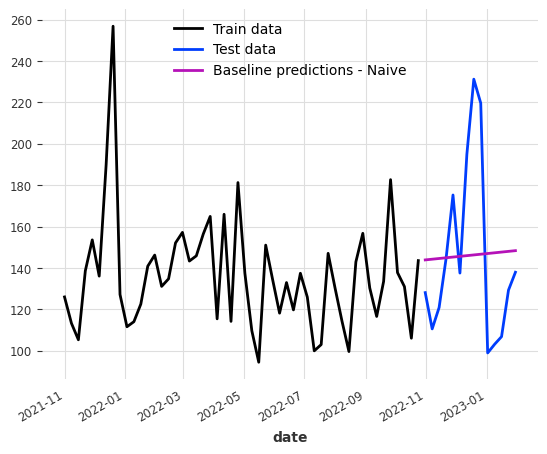

In [ ]:
#Plot train vs. test vs. predictions for Naive Drift
train.plot(label="Train data")
test.plot(label="Test data")
predictions_Naive.plot(label="Baseline predictions - Naive")

In [ ]:
# Evaluates performance
mape(test, predictions_Naive)

23.754104501261295